In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family = 'Malgun Gothic')

In [ ]:
df = pd.read_csv('./Loans.csv')

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'target'],
      dtype='object')

# 1. Data Load

**데이터 설명**

| 변수 명           | 설명                                    |
| ----------------- | --------------------------------------- |
| Loan_ID              | 고객 대출 ID                                |
| Gender            | 성별(남성/여성)                                |
| Married         | 결혼 여부(Yes/No)                             |
| Dependents        | 부양 가족 수 |
| Education           | 지원자 교육(졸업생/졸업생 이하)                                  |
| Self_Employed         | 자영업자(Yes/No)                                |
| ApplicantIncome     | 신청자 소득                                 |
| CoapplicatIncome             | 공동 신청 소득                               |
| LoanAmount      | 대출 금액(천단위)           |
| Loan_Amount_Term      | 대출 기간(월단위)                   |
| Credit_History      | 신용 기록                   |
| Property_Area     |거주지(도시/ 반도시/ 농촌)                   |
| target   | 대출 승인(Yes/No)                   |



In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban,Y
476,LP001367,Male,Yes,1,Graduate,No,3052,1030.0,100,360,1,Urban,Y
477,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200,360,1,Semiurban,Y
478,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157,360,1,Rural,Y


목적: 대출 승인 여부를 분류하는 모델을 만드는 것

# 2. Data Preprocess

## 2-1. 결측치 처리

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
target               0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
target                object
dtype: object

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y
2,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y
3,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y
4,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban,Y
476,Male,Yes,1,Graduate,No,3052,1030.0,100,360,1,Urban,Y
477,Male,Yes,3+,Graduate,No,5167,3167.0,200,360,1,Semiurban,Y
478,Male,Yes,2,Not Graduate,No,3987,1411.0,157,360,1,Rural,Y


## 2-2. 연속형 변수 정규화(MinMaxScaler)

In [ ]:
cont_col = df.dtypes[np.where(df.dtypes!='object')[0]].index.tolist()
cont_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

대출 승인 변수 형태 출력

In [ ]:
df['target'].unique()

array(['Y', 'N'], dtype=object)

변수 전처리 과정

* 대출 승인: 1
* 대출 거절: 0

In [ ]:
df.loc[df['target'] == 'Y', 'target'] = 1
df.loc[df['target'] == 'N', 'target'] = 0

대출 승인 변수 형태 출력

In [ ]:
df['target'].unique()

array([1, 0], dtype=object)

#2-3. 데이터 스케일링

In [ ]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()

* 연속형 변수만 선택하여 정규화 진행

In [ ]:
df[cont_col] = scaler.fit_transform(df[cont_col])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,Male,No,0,Graduate,No,0.059369,0.000000,0.196277,0.729730,1.0,Urban,1
1,Male,Yes,1,Graduate,No,0.033791,0.054467,0.192893,1.000000,1.0,Semiurban,1
2,Male,Yes,0,Graduate,No,0.035250,0.100955,0.079526,0.324324,1.0,Semiurban,1
3,Male,Yes,2,Graduate,No,0.118157,0.000000,0.174281,0.729730,1.0,Urban,1
4,Male,Yes,0,Graduate,No,0.027001,0.071431,0.214890,0.729730,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Male,Yes,3+,Graduate,No,0.492876,0.000000,1.000000,0.324324,0.0,Semiurban,1
476,Male,Yes,1,Graduate,No,0.035894,0.030440,0.153976,0.729730,1.0,Urban,1
477,Male,Yes,3+,Graduate,No,0.062053,0.093596,0.323181,0.729730,1.0,Semiurban,1
478,Male,Yes,2,Not Graduate,No,0.047458,0.041700,0.250423,0.729730,1.0,Rural,1


In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
target                object
dtype: object

* iloc에 대한 설명

  * iloc[row, column] 데이터의 특정 row 및 column의 위치를 포함하는 구간을 선택
  * -1의 의미 =  column중 맨 마지막의 column을 의미
  * :의 의미 = 전체를 선택한다는 의미

In [ ]:
x = df.iloc[:, :-1]
y = df['target']
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,0.059369,0.000000,0.196277,0.729730,1.0,Urban
1,Male,Yes,1,Graduate,No,0.033791,0.054467,0.192893,1.000000,1.0,Semiurban
2,Male,Yes,0,Graduate,No,0.035250,0.100955,0.079526,0.324324,1.0,Semiurban
3,Male,Yes,2,Graduate,No,0.118157,0.000000,0.174281,0.729730,1.0,Urban
4,Male,Yes,0,Graduate,No,0.027001,0.071431,0.214890,0.729730,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
475,Male,Yes,3+,Graduate,No,0.492876,0.000000,1.000000,0.324324,0.0,Semiurban
476,Male,Yes,1,Graduate,No,0.035894,0.030440,0.153976,0.729730,1.0,Urban
477,Male,Yes,3+,Graduate,No,0.062053,0.093596,0.323181,0.729730,1.0,Semiurban
478,Male,Yes,2,Not Graduate,No,0.047458,0.041700,0.250423,0.729730,1.0,Rural


y 데이터의 범주에 대한 데이터 수 출력

In [ ]:
y.value_counts()

1    332
0    148
Name: target, dtype: int64

#2-4 Train / Test data 분리

In [ ]:
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(x,y, test_size = 0.3)

print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(336, 11)
(336,)
(144, 11)
(144,)


* 범주형 데이터는 더미 변수화

  * 의사결정 나무 챕터에서 자세하게 다룰 예정
  * 직관적으로는 범주형 변수를 표현하기 위한 방법 중 하나라고 이해할 수 있음

In [ ]:
trainx = pd.get_dummies(trainx, prefix_sep = '_', drop_first = True)
testx = pd.get_dummies(testx, prefix_sep = '_', drop_first = True)
trainx

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
54,0.046382,0.000000,0.137056,0.729730,1.0,1,1,0,1,0,0,0,1,0
451,0.077093,0.029553,0.301184,0.729730,1.0,1,1,0,1,0,1,1,0,0
91,0.115696,0.000000,0.450085,0.729730,1.0,1,1,0,0,1,0,0,0,0
142,0.037143,0.046103,0.211506,0.729730,1.0,1,1,0,1,0,0,0,0,1
159,0.036017,0.058723,0.172589,0.324324,0.0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.049672,0.000000,0.059222,0.729730,1.0,0,0,0,0,0,0,0,1,0
76,0.065776,0.030499,0.028765,0.729730,1.0,1,1,1,0,0,0,0,1,0
239,0.048794,0.101871,0.240271,0.729730,1.0,1,0,0,0,0,0,0,0,0
390,0.051181,0.096433,0.209814,0.324324,1.0,1,1,0,1,0,1,0,0,1


In [ ]:
testx

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
455,0.034224,0.000000,0.126904,0.729730,1.0,0,0,0,0,0,0,0,1,0
343,0.086481,0.000000,0.218274,0.729730,1.0,0,1,0,0,0,1,1,0,0
78,0.059988,0.000000,0.208122,0.729730,1.0,0,0,0,0,0,0,0,0,0
321,0.034818,0.168484,0.247039,0.054054,1.0,1,0,0,0,0,0,0,0,1
123,0.030959,0.044330,0.175973,0.324324,0.0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.045875,0.000000,0.147208,0.729730,1.0,1,1,0,1,0,0,0,1,0
53,0.030303,0.050743,0.152284,0.594595,1.0,0,0,0,0,0,0,1,1,0
285,0.072356,0.000000,0.248731,0.729730,1.0,0,0,0,0,0,0,0,0,1
177,0.043797,0.000000,0.170897,0.729730,1.0,1,0,0,0,0,1,0,0,0


이전과 마찬가지로 데이터프레임 형태로 되어있으니 numpy의 array 형태로 변환시켜주자.

In [ ]:
trainx = trainx.to_numpy()
testx = testx.to_numpy()
trainy = trainy.to_numpy()
testy = testy.to_numpy()

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(336, 14)
(144, 14)
(336,)
(144,)


In [ ]:
trainy

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
trainy = trainy.astype('int')
testy = testy.astype('int')

In [ ]:
trainy

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

#3. 로지스틱 회귀 모델 구축

In [ ]:
model = LogisticRegression()

model.fit(trainx, trainy)

LogisticRegression()

In [ ]:
#로지스틱 회귀분석의 상수항 출력(Beta 0)
print(model.intercept_[0])

-1.8875420373372118


* 회귀 계수 출력

In [ ]:
#도출한 회귀 계수 출력
print(model.coef_[0])

[-2.61672915e-03 -4.55242734e-01 -7.55778423e-01 -5.16301869e-01
  2.74591953e+00  5.15377852e-01  2.91351943e-01 -1.21178866e-01
  1.42591050e-01  1.93520470e-01 -1.20643104e-01 -1.09175467e-01
  8.27993353e-01  1.56825187e-02]


In [ ]:
Beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2)
#model.intercept_: B_0
#model.coef_.reshape(-1): B_1, B_2, ..., B_30

In [ ]:
Beta

array([-1.89, -0.  , -0.46, -0.76, -0.52,  2.75,  0.52,  0.29, -0.12,
        0.14,  0.19, -0.12, -0.11,  0.83,  0.02])

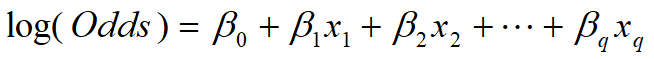

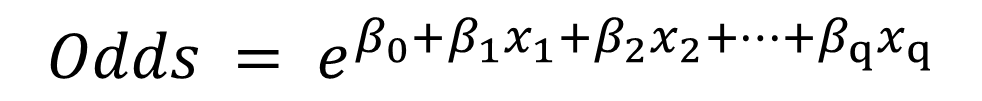

In [ ]:
odds = np.exp(Beta).round(2)
odds

array([ 0.15,  1.  ,  0.63,  0.47,  0.59, 15.64,  1.68,  1.34,  0.89,
        1.15,  1.21,  0.89,  0.9 ,  2.29,  1.02])

In [ ]:
print(np.exp(model.intercept_[0])) #지수함수의 상수 승
print(np.exp(model.coef_[0][0])) #지수 함수의 첫번째 변수에 대한 회귀 계수

0.15144359443226613
0.9973866914989962


* Beta는 각 x의 회귀 계수이다.

* x가 증가한다면 Odds는 지수적으로 증가 혹은 감소한다.

  * Beta 값이 0보다 크다면? Odds는 지수적으로 증가 할 것이고, 암으로 판단할 확률이 높아진다는 의미

  * Beta 값이 작다면? 해당 변수가 암이 아닐 확률이 높아지는 것에 기여한다는이다.

In [ ]:
interpret = np.where(Beta>0, '대출 승인 요소', '대출 거부 요소')
#Beta가 0보다 크다면 위험하다고, 아니면 위험하지 않다고 정의함

In [ ]:
interpret

array(['대출 거부 요소', '대출 거부 요소', '대출 거부 요소', '대출 거부 요소', '대출 거부 요소',
       '대출 승인 요소', '대출 승인 요소', '대출 승인 요소', '대출 거부 요소', '대출 승인 요소',
       '대출 승인 요소', '대출 거부 요소', '대출 거부 요소', '대출 승인 요소', '대출 승인 요소'],
      dtype='<U8')

In [ ]:
Col_name = ['상수']+x.columns.tolist()
print(Col_name)

['상수', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [ ]:
Final = pd.DataFrame()
Final['Beta'] = Beta
Final['Odds'] = odds
Final['해석'] = interpret

In [ ]:
Final

,Beta,Odds,해석
0,-1.89,0.15,대출 거부 요소
1,-0.00,1.00,대출 거부 요소
2,-0.46,0.63,대출 거부 요소
3,-0.76,0.47,대출 거부 요소
4,-0.52,0.59,대출 거부 요소
5,2.75,15.64,대출 승인 요소
6,0.52,1.68,대출 승인 요소
7,0.29,1.34,대출 승인 요소
8,-0.12,0.89,대출 거부 요소
9,0.14,1.15,대출 승인 요소


회귀 계수에 따라서 위험하다 혹은 위험하지 않은 인자들을 확인할 수 있음

In [ ]:
model.predict_proba(testx)

#첫번째: y = 0일 확률, 두번째: y = 1일 확률
#즉, 첫번째 열은 대출 거부 확률, 두번째 열은 대출 승인 확률을 의미함

In [ ]:
Result = pd.DataFrame(model.predict_proba(testx), columns = ['거절 확률', '승인 확률'])

In [ ]:
Result

,거절 확률,승인 확률
0,0.229063,0.770937
1,0.406620,0.593380
2,0.419661,0.580339
3,0.250109,0.749891
4,0.837989,0.162011
...,...,...
139,0.104560,0.895440
140,0.243805,0.756195
141,0.423328,0.576672
142,0.321459,0.678541


#4. 모델 평가

## 4-1. Cutoff 설정

* 확률값이 도출되었으나, Cut-off 값을 정하고, 이 값을 통해 의사결정을 함

 * 만약 Cut-off 값: 0.6으로 정한다면?

 * 대출 거절 확률이 0.6보다 크면 '대출 거절'으로 정하고, 0.4보다 작다면 '대출 승인'으로 정하는 과정

In [ ]:
def decision(x):
  Cutoff = 0.6
  if x >= Cutoff:
    return '대출 거절'
  else:
    return '대출 승인'

In [ ]:
Result['판정'] = Result['거절 확률'].apply(decision)

In [ ]:
Result

,거절 확률,승인 확률,판정
0,0.229063,0.770937,대출 승인
1,0.406620,0.593380,대출 승인
2,0.419661,0.580339,대출 승인
3,0.250109,0.749891,대출 승인
4,0.837989,0.162011,대출 거절
...,...,...,...
139,0.104560,0.895440,대출 승인
140,0.243805,0.756195,대출 승인
141,0.423328,0.576672,대출 승인
142,0.321459,0.678541,대출 승인


## 4-1. 오분류표 도출 및 해석

In [ ]:
confusion_matrix(Result['판정'] == '대출 거절', testy == 0)

array([[100,  20],
       [  1,  23]])

In [ ]:
print('정확도:',(100+20) / (100+20+1+23))

정확도: 0.8333333333333334


In [ ]:
print('정밀도:',round((96)/(96+2), 2))

정밀도: 0.98


In [ ]:
print('재현도:',round((96)/(96+23), 2))

재현도: 0.81



| 오분류표           | 예측: O   | 예측: X                     |
| ----------------- | --------------------------------------- |------- |
| 실제: O              | TP        |FN         |
| 실제: X          | FP     |TN         |

* 병원에서 암을 진단하는 문제를 생각해 보자.

* 악성과 양성의 환자 비율이 다를 경우에는 문제가 생김

* 세상에는 악성 환자 비율보다 양성의 환자 비율이 훨씬 높음

* 악성이 1명, 양성이 100000명 꼴로 일어난다고 한다면?

* 모델은 항상 양성이라고 예측하더라도, 예측 정확도가 1/100000밖에 차이나지 않음

* 따라서 이러한 경우에, 새로운 평가 지표가 필요함



# P, N: Positive, Negative
* 모델이 예측한 것

# T, F: True, False
* 실제와 같은지?


#### FN: N(모델이 거짓이라고 예측한 것), F(실제와 다름,  즉 FN은 실제 상황이 참인 상황)

#### FP: P(모델이 참이라고 예측한 것), F(실제와 다름, 즉 FP는 실제 상황이 거짓인 상황)

##정밀도: 모델이 참이라고 예측한 것 중, 실제 값이 참인 것

##재현도: 실제 값이 참인 것 중, 모델이 참이라고 분류한 비율

* (암일 경우에는, 실제 암 환자를 오진하는 경우가 더 중요한 문제이므로 이러한 척도를 사용해야 함)

##참고

해결하려는 문제에 따라서 중요하게 봐야 하는 오분류 척도가 다름

둘 다 TP의 비율을 보는 것인데

정밀도는 모델의 관점에서

재현도는 실제 상황을 관점으로 해석하는 것

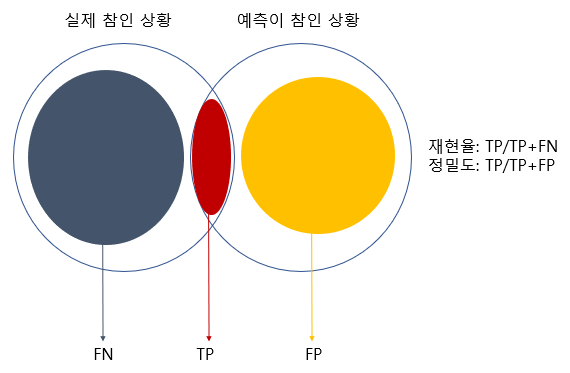